<a href="https://colab.research.google.com/github/iammahendragit/myproject/blob/main/dtypemyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [ ]:
weather_df = pd.read_csv('FinalSetOfData.csv', parse_dates=['Date'], index_col='Date')
weather_df.head(5)

,miniTemp,maxTemp,humidityAt3,humidityAt12,precipitation
Date,,,,,
2010-01-01,10.0,19.0,92.5,91.1,0.0
2010-01-02,10.5,22.7,77.7,95.7,0.0
2010-01-03,10.0,18.5,94.8,95.3,0.0
2010-01-04,8.5,18.5,89.6,100.0,0.0
2010-01-05,7.0,21.5,97.2,100.0,0.0


In [ ]:
weather_df.columns


Index(['miniTemp', 'maxTemp', 'humidityAt3', 'humidityAt12', 'precipitation'], dtype='object')

In [ ]:
weather_df.shape

(4376, 5)

In [ ]:
weather_df.describe()

,miniTemp,maxTemp,humidityAt3,humidityAt12,precipitation
count,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,20.218053,29.857313,80.244637,82.382729,5.737361
std,5.031388,4.007211,12.064301,13.205556,17.013509
min,1.900000,9.000000,32.800000,8.600000,0.000000
25%,16.200000,27.500000,72.230000,75.700000,0.000000
50%,21.500000,31.000000,81.700000,85.200000,0.000000
75%,24.500000,32.825000,89.700000,92.200000,2.200000
max,28.000000,38.800000,100.000000,100.000000,292.900000


In [ ]:
weather_df.isnull().any()

miniTemp         False
maxTemp          False
humidityAt3      False
humidityAt12     False
precipitation    False
dtype: bool

In [ ]:
weather_df_num=weather_df.loc[:,['miniTemp','maxTemp','humidityAt3','humidityAt12','precipitation']
                              ]
weather_df_num.head()

,miniTemp,maxTemp,humidityAt3,humidityAt12,precipitation
Date,,,,,
2010-01-01,10.0,19.0,92.5,91.1,0.0
2010-01-02,10.5,22.7,77.7,95.7,0.0
2010-01-03,10.0,18.5,94.8,95.3,0.0
2010-01-04,8.5,18.5,89.6,100.0,0.0
2010-01-05,7.0,21.5,97.2,100.0,0.0


In [ ]:
weather_df_num.shape

(4376, 5)

In [ ]:
weather_df_num.columns

Index(['miniTemp', 'maxTemp', 'humidityAt3', 'humidityAt12', 'precipitation'], dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe06fe270d0>,
      dtype=object)

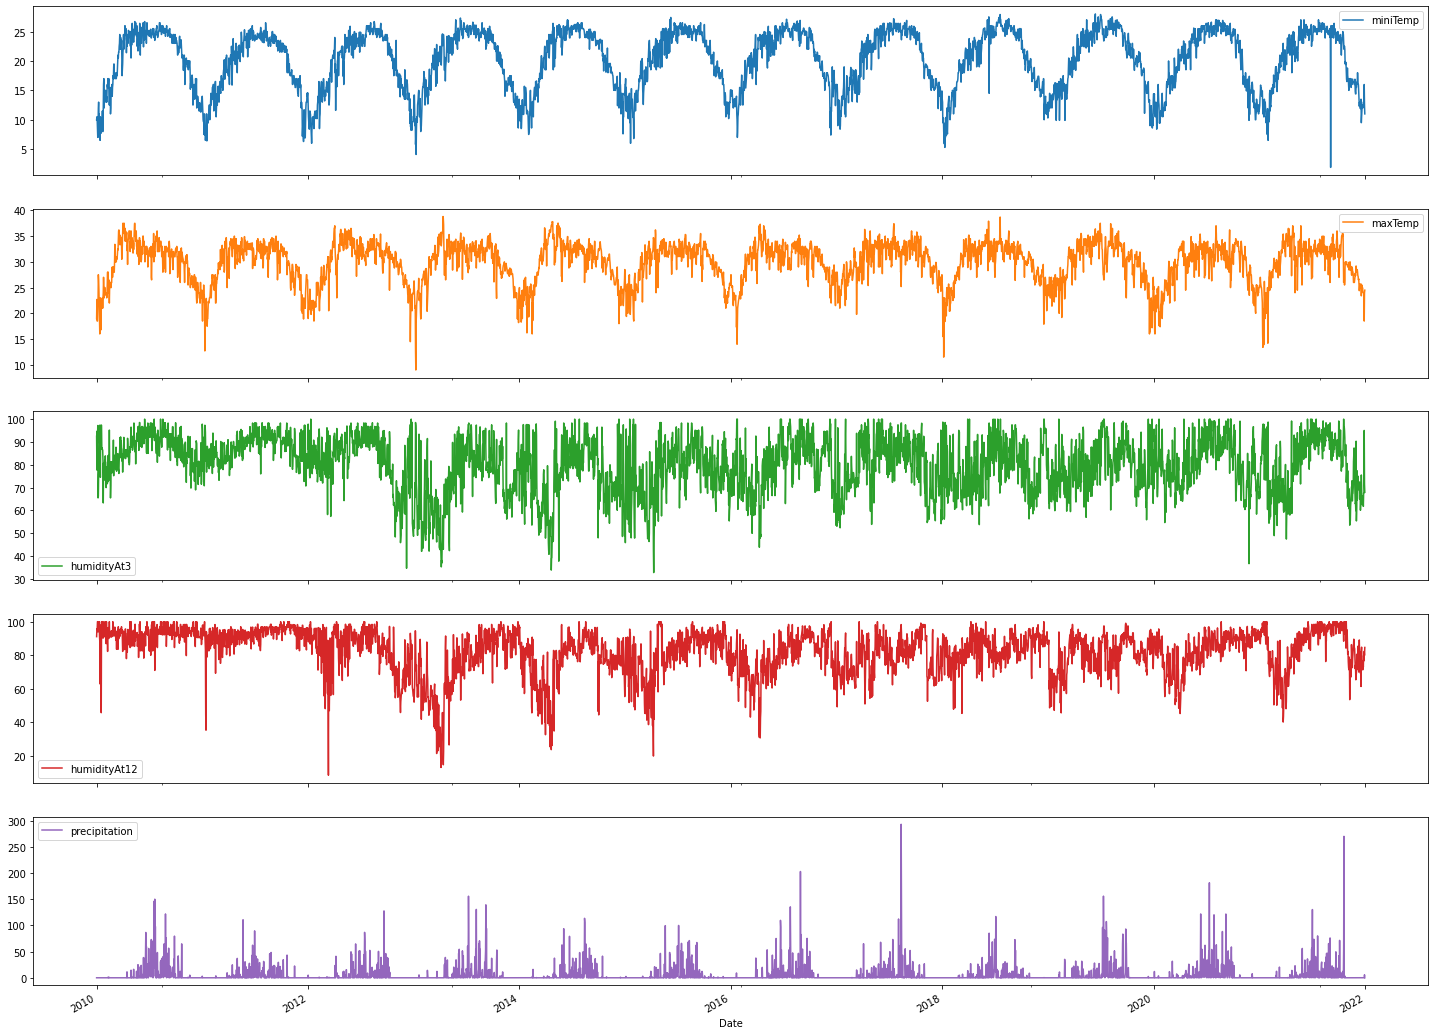

In [ ]:
weather_df_num.plot(subplots=True, figsize=(25,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe07eb83590>,
      dtype=object)

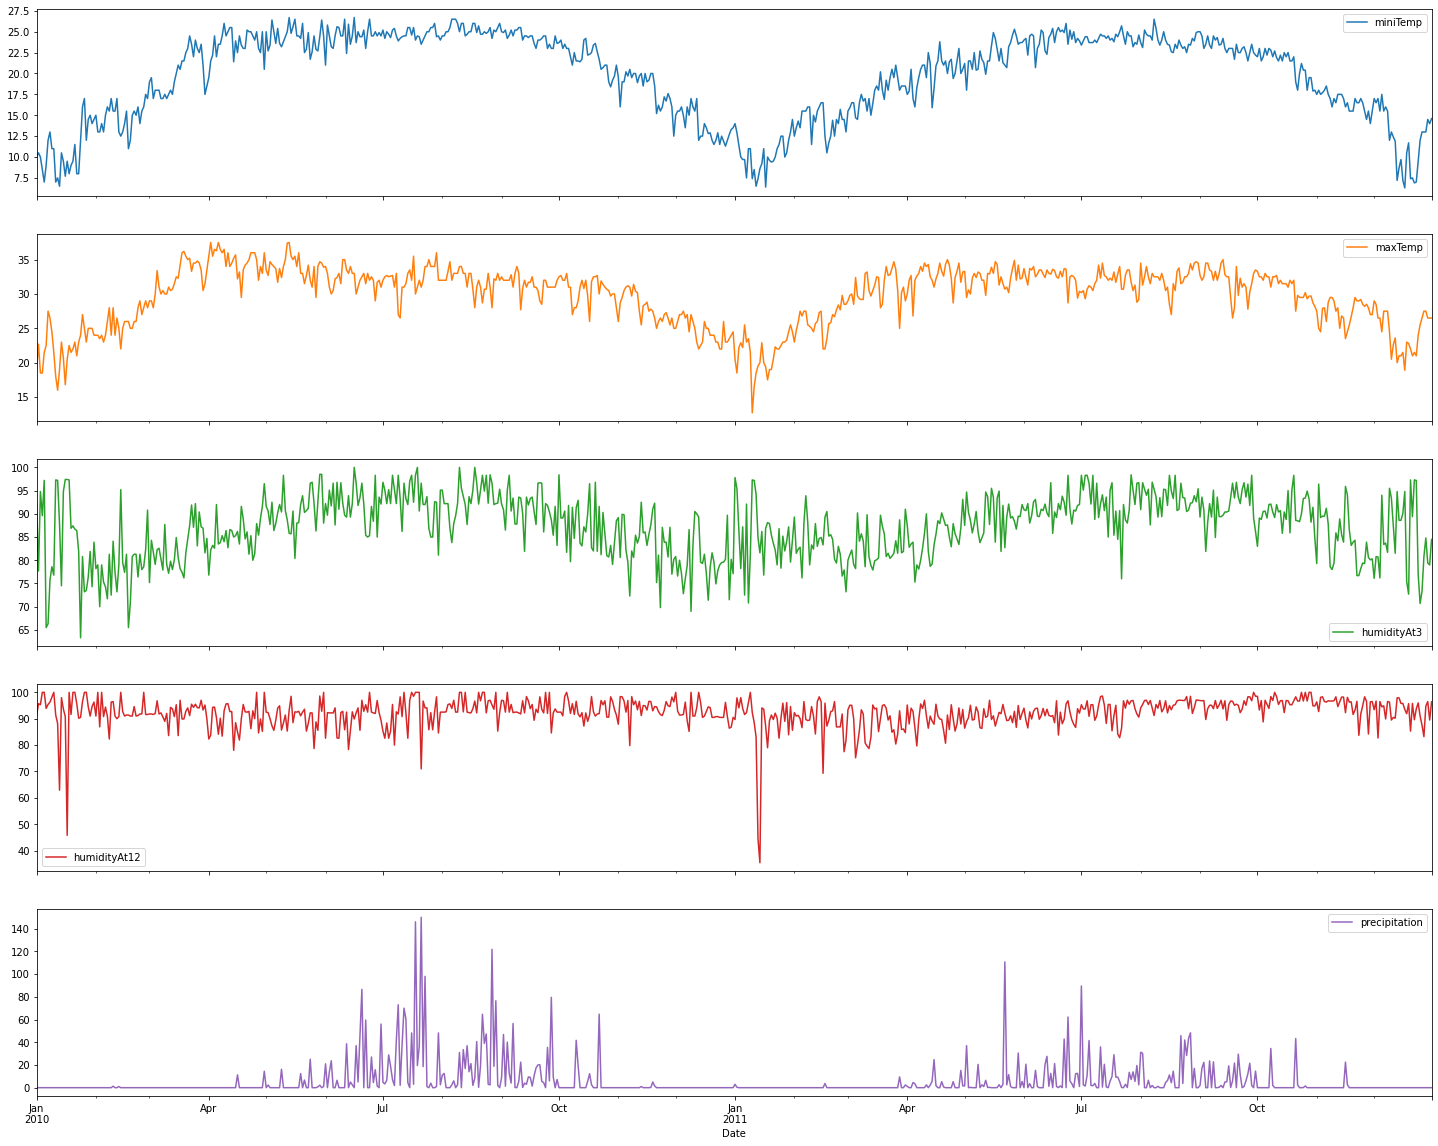

In [ ]:
#ploting the 1 year of data
weather_df_num['2010':'2011'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe06fe4a050>,
      dtype=object)

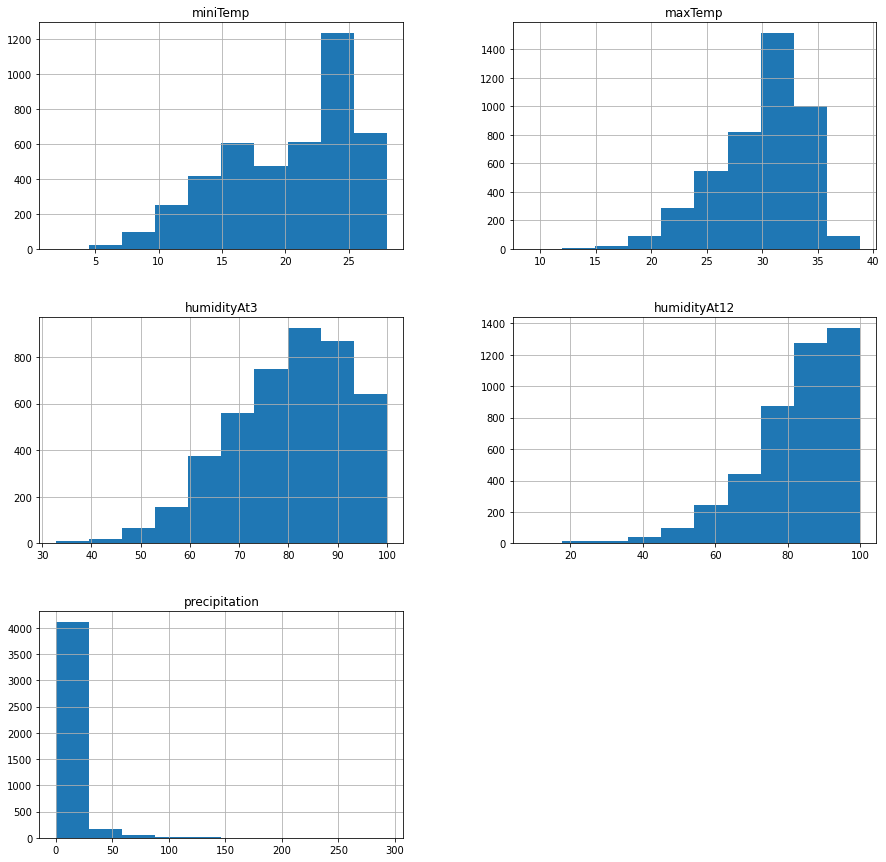

In [ ]:
weather_df_num.hist(bins=10,figsize=(15,15))


In [ ]:
weth=weather_df_num['2019':'2020']
weth.head()


,miniTemp,maxTemp,humidityAt3,humidityAt12,precipitation
Date,,,,,
2019-01-01,10.3,25.2,87.3,86.7,0.0
2019-01-02,13.0,25.5,83.3,86.6,0.0
2019-01-03,11.5,25.0,79.0,86.4,0.0
2019-01-04,11.4,23.4,63.3,89.1,0.0
2019-01-05,12.7,24.9,72.6,59.9,0.0


In [ ]:
weather_df_num

,miniTemp,maxTemp,humidityAt3,humidityAt12
Date,,,,
2010-01-01,10.0,19.0,92.50,91.10
2010-01-02,10.5,22.7,77.70,95.70
2010-01-03,10.0,18.5,94.80,95.30
2010-01-04,8.5,18.5,89.60,100.00
2010-01-05,7.0,21.5,97.20,100.00
...,...,...,...,...
2021-12-27,13.0,24.0,67.56,79.82
2021-12-28,12.6,24.0,67.62,76.69
2021-12-29,16.0,18.5,95.04,82.33


In [ ]:
weather_y=weather_df_num.pop("miniTemp")
weather_x=weather_df_num


In [ ]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [ ]:
train_X.shape

(3500, 4)

In [ ]:
train_y.shape

(3500,)

In [ ]:
train_y.head

<bound method NDFrame.head of Date
2010-06-29    24.9
2010-09-12    24.0
2013-10-06    22.7
2016-10-12    23.3
2013-10-13    22.4
              ... 
2020-01-27    10.6
2011-12-11    12.4
2016-10-27    21.4
2010-06-24    26.5
2013-02-23    16.8
Name: miniTemp, Length: 3500, dtype: float64>

In [ ]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
prediction = model.predict(test_X)

In [ ]:
np.mean(np.absolute(prediction-test_y))

1.6700995490819144

In [ ]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.81


In [ ]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
Date,,,
2014-03-24,19.0,18.62,0.38
2011-01-30,13.0,15.44,-2.44
2011-11-09,16.0,19.50,-3.50
2011-12-05,17.5,16.01,1.49
2011-02-17,12.5,12.94,-0.44
...,...,...,...
2010-05-28,22.7,25.85,-3.15
2019-03-06,15.0,16.39,-1.39
2019-05-01,24.9,22.23,2.67


In [ ]:
dataset = pd.read_csv('FinalSetOfData.csv', parse_dates=[
    'Date'], index_col='Date')

relHumidity["Humidity"]=pd.DataFrame((dataset.humidityAt12+dataset.humidityAt3)/2)
dataset = pd.merge(dataset, relHumidity, on="Date")
dataset

# relHumidity["Temp"] = pd.DataFrame(
#     (dataset.humidityAt12+dataset.humidityAt3)/2)
# dataset = pd.merge(dataset, relHumidity["Temp"], on="Date")
# dataset
# dataset.to_csv('./Mahendra.csv', index=False)

,miniTemp,maxTemp,humidityAt3,humidityAt12,precipitation,0
Date,,,,,,
2010-01-01,10.0,19.0,92.50,91.10,0.0,91.800
2010-01-02,10.5,22.7,77.70,95.70,0.0,86.700
2010-01-03,10.0,18.5,94.80,95.30,0.0,95.050
2010-01-04,8.5,18.5,89.60,100.00,0.0,94.800
2010-01-05,7.0,21.5,97.20,100.00,0.0,98.600
...,...,...,...,...,...,...
2021-12-27,13.0,24.0,67.56,79.82,0.0,73.690
2021-12-28,12.6,24.0,67.62,76.69,0.0,72.155
2021-12-29,16.0,18.5,95.04,82.33,0.1,88.685


In [ ]:

dataset = pd.read_csv('FinalSetOfData.csv', parse_dates=[
    'Date'], index_col='Date')

relHumidity["Humidity"]=pd.DataFrame((dataset.humidityAt12+dataset.humidityAt3)/2)
dataset = pd.merge(dataset, relHumidity["Humidity"], on="Date")
dataset

relHumidity["Temp"] = pd.DataFrame(
    (dataset.humidityAt12+dataset.humidityAt3)/2)
dataset = pd.merge(dataset, relHumidity["Temp"], on="Date")
dataset


,miniTemp,maxTemp,humidityAt3,humidityAt12,precipitation,Humidity,Temp
Date,,,,,,,
2010-01-01,10.0,19.0,92.50,91.10,0.0,91.800,91.800
2010-01-02,10.5,22.7,77.70,95.70,0.0,86.700,86.700
2010-01-03,10.0,18.5,94.80,95.30,0.0,95.050,95.050
2010-01-04,8.5,18.5,89.60,100.00,0.0,94.800,94.800
2010-01-05,7.0,21.5,97.20,100.00,0.0,98.600,98.600
...,...,...,...,...,...,...,...
2021-12-27,13.0,24.0,67.56,79.82,0.0,73.690,73.690
2021-12-28,12.6,24.0,67.62,76.69,0.0,72.155,72.155
2021-12-29,16.0,18.5,95.04,82.33,0.1,88.685,88.685


In [ ]:
dataset.to_csv('./Mahendra.csv', index=False)


In [ ]:
dataset = pd.read_csv('Mahendra.csv')

In [ ]:
dataset

,miniTemp,maxTemp,humidityAt3,humidityAt12,precipitation,Humidity,Temp
0,10.0,19.0,92.50,91.10,0.0,91.800,91.800
1,10.5,22.7,77.70,95.70,0.0,86.700,86.700
2,10.0,18.5,94.80,95.30,0.0,95.050,95.050
3,8.5,18.5,89.60,100.00,0.0,94.800,94.800
4,7.0,21.5,97.20,100.00,0.0,98.600,98.600
...,...,...,...,...,...,...,...
4371,13.0,24.0,67.56,79.82,0.0,73.690,73.690
4372,12.6,24.0,67.62,76.69,0.0,72.155,72.155
4373,16.0,18.5,95.04,82.33,0.1,88.685,88.685
4374,12.5,24.0,71.48,79.92,5.7,75.700,75.700


In [ ]:
dataset.Temp

0       91.800
1       86.700
2       95.050
3       94.800
4       98.600
         ...  
4371    73.690
4372    72.155
4373    88.685
4374    75.700
4375    76.315
Name: Temp, Length: 4376, dtype: float64